In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from individual_file import processor

In [2]:
comp = pd.DataFrame()
for number in range(2010,2020):
    comp[str(number)] = processor("acs\\{}_full.csv".format(number)).Delta
comp.insert(0, "Label", processor("acs/2017_full.csv").Label)
comp

,Label,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Total population,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Male,0.156466,0.122810,0.138071,0.153884,0.149419,0.149592,0.152752,0.145460,0.123519,0.123209
2,Female,-0.156466,-0.122810,-0.138071,-0.153884,-0.149419,-0.149592,-0.152752,-0.145460,-0.123519,-0.123209
3,Sex ratio (males per 100 females),-0.018866,-0.036165,-0.036866,-0.040606,-0.043992,-0.048359,-0.044623,0.028927,0.028717,0.028752
4,Under 5 years,-0.094031,-0.087530,-0.048968,-0.051093,-0.045823,-0.058620,-0.023609,-0.042236,-0.068529,-0.069713
...,...,...,...,...,...,...,...,...,...,...,...
68,Puerto Rican,-0.032882,-1.511352,-0.027184,-0.033534,0.761133,0.725298,-0.990907,-0.403978,-0.471374,-0.485394
69,Cuban,0.368466,0.751089,0.366594,0.379870,-1.245835,-1.310496,6.895091,-0.448287,-1.078123,-1.111224
70,Other Hispanic or Latino,-0.009381,-1.075642,-0.016817,-0.015325,0.153163,0.136950,8.372992,-1.109619,7.242535,7.313978
71,Not Hispanic or Latino,0.377846,0.146739,0.383411,0.395195,-0.040987,-0.031258,-1.414725,7.139223,8.637067,8.682231


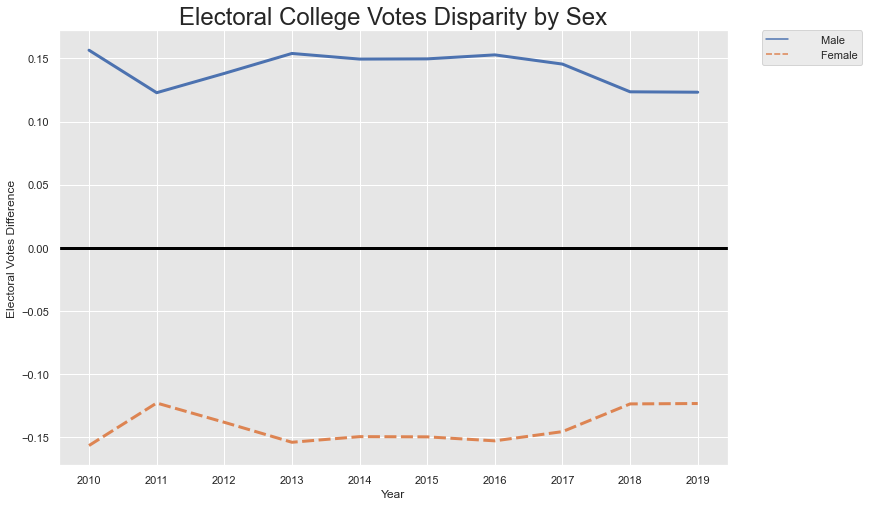

In [3]:
def plotter(temp, plot_topic):
    temp = temp.set_index("Label")
    temp = temp.transpose()

    sns.set(rc={'figure.figsize':(12,8)})

    # sns.set(style="whitegrid") #White background 
    sns.set_style("darkgrid", {"axes.facecolor": ".9"}) #grey background

    g = sns.lineplot(data = temp,linestyle = '-', linewidth = 3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    #axis line at y=0
    g.axhline(0, color = 'black', linewidth = 3)

    #labels + title
    g.set_title("Electoral College Votes Disparity by " + plot_topic, size=24)
    g.set(xlabel='Year', ylabel= "Electoral Votes Difference")
    return g

def gender(data):
    return plotter(data[1:3], "Sex")

def age(data):
    return plotter(data[8:14], "Age")


gender(comp)

In [4]:
sex = comp[1: 3]
sex

,Label,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Male,0.156466,0.12281,0.138071,0.153884,0.149419,0.149592,0.152752,0.14546,0.123519,0.123209
2,Female,-0.156466,-0.12281,-0.138071,-0.153884,-0.149419,-0.149592,-0.152752,-0.14546,-0.123519,-0.123209


In [5]:
sex = sex.T
sex.columns = sex.iloc[0]
sex

Label,Male,Female
Label,Male,Female
2010,0.156466,-0.156466
2011,0.12281,-0.12281
2012,0.138071,-0.138071
2013,0.153884,-0.153884
2014,0.149419,-0.149419
2015,0.149592,-0.149592
2016,0.152752,-0.152752
2017,0.14546,-0.14546
2018,0.123519,-0.123519


In [6]:
temp = sex.drop(index="Label")
temp

Label,Male,Female
2010,0.156466,-0.156466
2011,0.12281,-0.12281
2012,0.138071,-0.138071
2013,0.153884,-0.153884
2014,0.149419,-0.149419
2015,0.149592,-0.149592
2016,0.152752,-0.152752
2017,0.14546,-0.14546
2018,0.123519,-0.123519
2019,0.123209,-0.123209


In [7]:
males = list(temp.iloc[:, 0])
females = list(temp.iloc[:, 1])

In [8]:
females.extend(males)
gender = [int(i/10) for i in range(20)]

In [9]:
pog = pd.DataFrame(
{
    "Delta": females,
    "Gender": gender
})

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


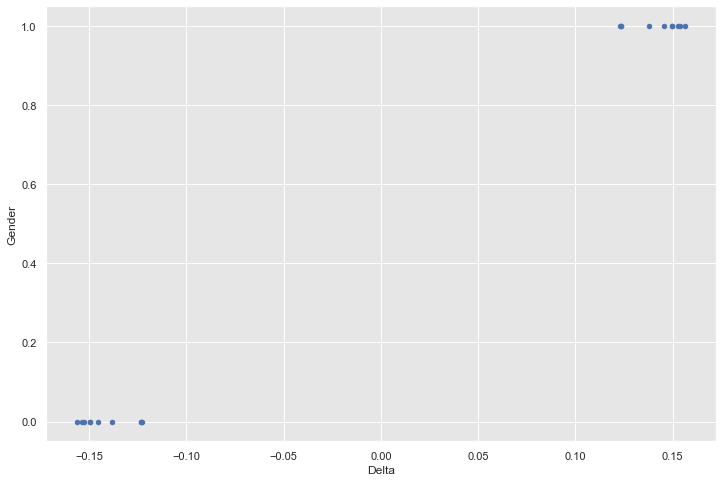

In [10]:
pog.plot(kind = "scatter", x="Delta", y="Gender")

In [11]:
from sklearn.utils import shuffle

In [12]:
pog = shuffle(pog)
pog

,Delta,Gender
9,-0.123209,0
15,0.149592,1
11,0.122810,1
14,0.149419,1
0,-0.156466,0
5,-0.149592,0
1,-0.122810,0
16,0.152752,1
17,0.145460,1
8,-0.123519,0


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
pog.index = [*range(20)]
pog

,Delta,Gender
0,-0.123209,0
1,0.149592,1
2,0.122810,1
3,0.149419,1
4,-0.156466,0
5,-0.149592,0
6,-0.122810,0
7,0.152752,1
8,0.145460,1
9,-0.123519,0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(pog.Delta, pog.Gender, test_size = 0.3)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
model = LogisticRegression()

In [18]:
model.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

C:\Users\Aref\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [19]:
X_train = X_train.values.reshape(-1,1)

In [20]:
model.score(X_test.values.reshape(-1,1), y_test.values.reshape(-1,1))

0.3333333333333333

In [26]:
X_test.values.reshape(-1,1)

array([[ 0.15275193],
       [-0.12320949],
       [-0.15388399],
       [ 0.1564656 ],
       [-0.14959203],
       [-0.1380708 ]])

In [23]:
model.predict_proba(X_test.values.reshape(-1,1))

array([[0.39895341, 0.60104659],
       [0.4597296 , 0.5402704 ],
       [0.46659465, 0.53340535],
       [0.39815213, 0.60184787],
       [0.46563327, 0.53436673],
       [0.46305386, 0.53694614]])

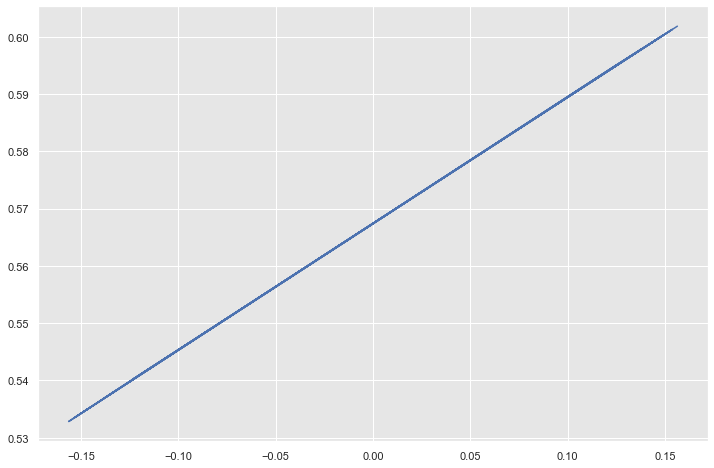

In [32]:
plt.plot(
    pog.Delta.values.reshape(-1,1) ,
    model.predict_proba(pog.Delta.values.reshape(-1,1))[:,1]
           )

C:\Users\Aref\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\Aref\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:893: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\Aref\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


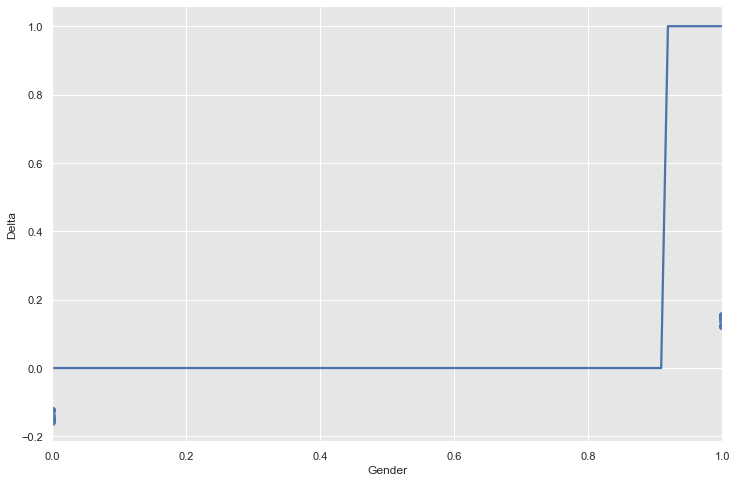

In [33]:
sns.regplot(x="Gender", y="Delta", 
            data=pog, logistic=True, ci = None)